# A linear regression learning algorithm example using TensorFlow library.

Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [6]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [7]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.085164942 W= 0.300318 b= 0.436562
Epoch: 0100 cost= 0.084217295 W= 0.297301 b= 0.458265
Epoch: 0150 cost= 0.083379284 W= 0.294463 b= 0.478677
Epoch: 0200 cost= 0.082638234 W= 0.291795 b= 0.497874
Epoch: 0250 cost= 0.081982896 W= 0.289285 b= 0.515931
Epoch: 0300 cost= 0.081403434 W= 0.286924 b= 0.532913
Epoch: 0350 cost= 0.080891043 W= 0.284704 b= 0.548885
Epoch: 0400 cost= 0.080437981 W= 0.282616 b= 0.563907
Epoch: 0450 cost= 0.080037348 W= 0.280652 b= 0.578037
Epoch: 0500 cost= 0.079683095 W= 0.278804 b= 0.591327
Epoch: 0550 cost= 0.079369880 W= 0.277067 b= 0.603827
Epoch: 0600 cost= 0.079092987 W= 0.275433 b= 0.615583
Epoch: 0650 cost= 0.078848228 W= 0.273896 b= 0.626637
Epoch: 0700 cost= 0.078631856 W= 0.272451 b= 0.637034
Epoch: 0750 cost= 0.078440562 W= 0.271091 b= 0.646812
Epoch: 0800 cost= 0.078271449 W= 0.269813 b= 0.65601
Epoch: 0850 cost= 0.078121968 W= 0.268611 b= 0.66466
Epoch: 0900 cost= 0.077989839 W= 0.26748 b= 0.672796
Epoch: 0950 cost= 0.077873051 W

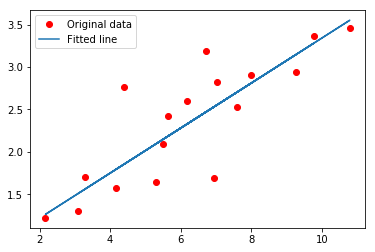

In [9]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()